In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../data/Loyers.csv')
df


,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
...,...,...
540,1490,48
541,2020,58
542,2050,70
543,1220,42


In [9]:
# On peut considérer un extrait de taille plus petite du data pour le visualiser
X=df['surface']
y=df['loyer']

## 1. Model from scratch avec numpy

In [4]:
## params
np.random.seed(42)
w = np.random.randn(1)
b= np.random.randn(1)
apla = 0.0001
epochs = 1000

In [5]:
## models
def model(X,w,b):
    return X*w + b

def mse(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

def gradient(X,y,y_pred):
    dw= -2 *np.mean(X*(y-y_pred))
    db = -2 *np.mean(y-y_pred)

    return dw,db

In [10]:
losses =[]
for i in range(epochs):
    y_pred = model(X,w,b)
    loss= mse(y,y_pred)
    losses.append(loss)

    dw,db = gradient(X,y,y_pred)
    w= w - apla*dw
    b= b - apla*db

    if i%100 ==0:
        print(f"epoch {i} : w={w}, b={b}, loss={loss}")

epoch 0 : w=[39.03712041], b=[6.87769048], loss=968358.5391791011
epoch 100 : w=[38.11001947], b=[4.71688032], loss=891405.686150801
epoch 200 : w=[38.13122709], b=[2.58143635], loss=890949.5760755163
epoch 300 : w=[38.15227752], b=[0.46182089], loss=890500.2025761885
epoch 400 : w=[38.17317191], b=[-1.64208337], loss=890057.4661561002
epoch 500 : w=[38.19391142], b=[-3.7303929], loss=889621.268788062
epoch 600 : w=[38.21449721], b=[-5.80322328], loss=889191.5138927103
epoch 700 : w=[38.23493042], b=[-7.86068925], loss=888768.1063171232
epoch 800 : w=[38.25521216], b=[-9.90290469], loss=888350.9523137511
epoch 900 : w=[38.27534357], b=[-11.92998266], loss=887939.9595196614


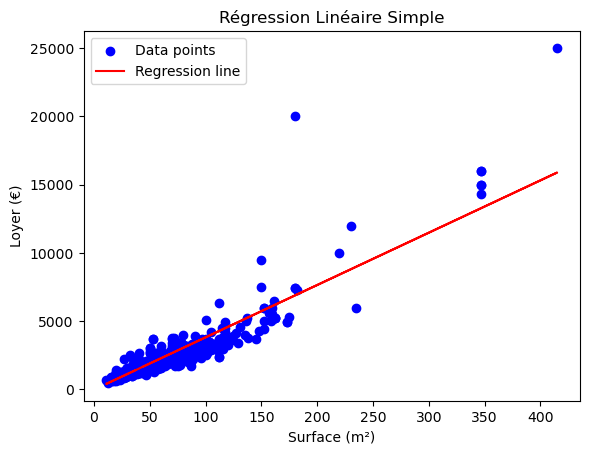

In [11]:
## Visualsation
plt.scatter(X,y, color='blue', label='Data points')
plt.plot(X, model(X,w,b), color='red', label='Regression line')
plt.xlabel('Surface (m²)')
plt.ylabel('Loyer (€)')
plt.title('Régression Linéaire Simple')
plt.legend()
plt.show()

In [12]:
# Faire sortir les coefficients
print(f"Coefficients finaux : w={w}, b={b}")


Coefficients finaux : w=[38.29512668], b=[-13.92198883]


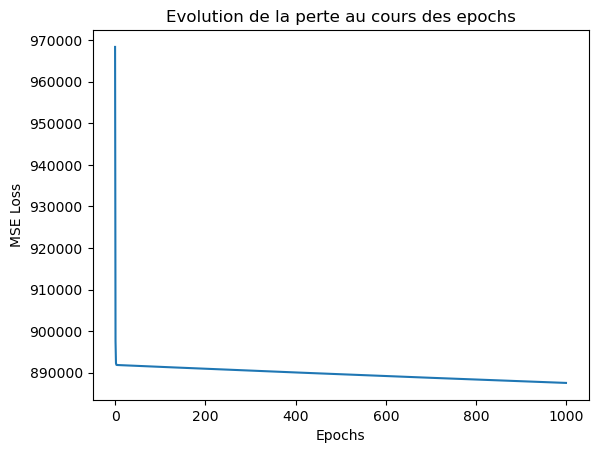

In [13]:
## Visualiser les losses
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Evolution de la perte au cours des epochs')
plt.show()

In [29]:
# Prédiction
surface_test = 75
prix_pred = b + w * surface_test
print(f"Prix prédit pour {surface_test} m² : {prix_pred.item():.2f} €")


Prix prédit pour 75 m² : 70.84 €


## 2. Un regresseur avec sklearn

In [ ]:
## Utilisation de sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
X = X.values.reshape(-1, 1)  # Reshape for sklearn
y = y.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(f"Intercept (b) = {model.intercept_:.2f}, Coefficient (w) = {model.coef_[0]:.2f}")

# Prédiction
surface_test = np.array([[75]])
prix_pred = model.predict(surface_test)
print(f"Prix prédit pour 75 m² : {prix_pred[0]:.2f} €")

Intercept (b) = -311.00, Coefficient (w) = 41.64
Prix prédit pour 75 m² : 2811.63 €


## 3. Un regresseur simple avec Tensorflow

In [20]:
# !pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
X_norm = (X - X_mean) / X_std
y_norm = (y - y_mean) / y_std


model = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(1)  # régression linéaire
])


model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='mse')



Poids normalisés -> w = 0.9445, b = 0.0019


In [27]:
# Entraînement
model.fit(X_norm, y_norm, epochs=500, verbose=0)


In [26]:
# Récupération des poids
w, b = model.layers[0].get_weights()
print(f"Poids normalisés -> w = {w[0][0]:.4f}, b = {b[0]:.4f}")

Poids normalisés -> w = 0.9445, b = 0.0019


In [ ]:

surface_test = np.array([[75]], dtype=np.float32)
prix_pred_norm = model.predict((surface_test - X_mean) / X_std)
prix_pred = prix_pred_norm * y_std + y_mean
print(f"Prix prédit pour 75 m² : {prix_pred[0][0]:.2f} €")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prix prédit pour 75 m² : 2813.62 €
